## NYPD Arrest Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset

df = pd.read_csv(r"C:\Users\SMei\OneDrive - Healthfirst\Documents\NYPD_Arrest_Data__Year_to_Date.csv")

In [3]:
#viewing the first 10 rows of the dataset

df.head(10)


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)
5,281488967,02/01/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,113,0,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
6,280769124,01/19/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,6,0,25-44,M,BLACK,984134,207984,40.737547,-74.000415,POINT (-74.000415 40.737547)
7,281338081,01/30/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,26,0,25-44,M,BLACK,996014,236126,40.814780,-73.957499,POINT (-73.957499 40.81478)
8,280961365,01/23/2024,NaN,(null),NaN,(null),(null),(null),M,5,97,25-44,M,BLACK,983903,200257,40.716337,-74.001251,POINT (-74.001251 40.716337)
9,281426006,01/31/2024,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,0,18-24,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)


In [4]:
#checking number of rows and columns
df.shape

(63621, 19)

In [5]:
#column names
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [6]:
#checking the count of non-null values and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                63621 non-null  int64  
 1   ARREST_DATE               63621 non-null  object 
 2   PD_CD                     63619 non-null  float64
 3   PD_DESC                   63621 non-null  object 
 4   KY_CD                     63612 non-null  float64
 5   OFNS_DESC                 63621 non-null  object 
 6   LAW_CODE                  63621 non-null  object 
 7   LAW_CAT_CD                63219 non-null  object 
 8   ARREST_BORO               63621 non-null  object 
 9   ARREST_PRECINCT           63621 non-null  int64  
 10  JURISDICTION_CODE         63621 non-null  int64  
 11  AGE_GROUP                 63621 non-null  object 
 12  PERP_SEX                  63621 non-null  object 
 13  PERP_RACE                 63621 non-null  object 
 14  X_COOR

In [7]:
#creating a new dataframe for columns i will be working with

df_new = df[['ARREST_BORO', 'ARREST_DATE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'OFNS_DESC']]
df_new

,ARREST_BORO,ARREST_DATE,AGE_GROUP,PERP_SEX,PERP_RACE,OFNS_DESC
0,M,01/10/2024,<18,M,BLACK,ROBBERY
1,K,01/02/2024,25-44,M,WHITE HISPANIC,RAPE
2,Q,01/03/2024,65+,F,WHITE,ASSAULT 3 & RELATED OFFENSES
3,B,01/19/2024,45-64,M,BLACK,DANGEROUS DRUGS
4,K,01/11/2024,25-44,F,BLACK,FELONY ASSAULT
...,...,...,...,...,...,...
63616,K,02/27/2024,45-64,M,WHITE HISPANIC,PETIT LARCENY
63617,M,03/12/2024,45-64,M,BLACK,DANGEROUS DRUGS
63618,K,03/07/2024,25-44,M,BLACK,ROBBERY
63619,K,03/01/2024,25-44,F,BLACK,VEHICLE AND TRAFFIC LAWS


In [8]:
#checking for any nan values in df_new
df_new.isnull().sum()

ARREST_BORO    0
ARREST_DATE    0
AGE_GROUP      0
PERP_SEX       0
PERP_RACE      0
OFNS_DESC      0
dtype: int64

In [9]:
# Renaming abbreviated boroughs with boough names

df_new['ARREST_BORO'].mask(df['ARREST_BORO']=="K", 'Brooklyn', inplace=True)
df_new['ARREST_BORO'].mask(df['ARREST_BORO']=="B", 'Bronx', inplace=True)
df_new['ARREST_BORO'].mask(df['ARREST_BORO']=="M", 'Manhattan', inplace=True)
df_new['ARREST_BORO'].mask(df['ARREST_BORO']=="S", 'Staten Island', inplace=True)
df_new['ARREST_BORO'].mask(df['ARREST_BORO']=="Q", 'Queens', inplace=True)

df_new.head()


C:\Users\SMei\AppData\Local\Temp\ipykernel_8700\1269867777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ARREST_BORO'].mask(df['ARREST_BORO']=="K", 'Brooklyn', inplace=True)
C:\Users\SMei\AppData\Local\Temp\ipykernel_8700\1269867777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ARREST_BORO'].mask(df['ARREST_BORO']=="B", 'Bronx', inplace=True)
C:\Users\SMei\AppData\Local\Temp\ipykernel_8700\1269867777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,ARREST_BORO,ARREST_DATE,AGE_GROUP,PERP_SEX,PERP_RACE,OFNS_DESC
0,Manhattan,01/10/2024,<18,M,BLACK,ROBBERY
1,Brooklyn,01/02/2024,25-44,M,WHITE HISPANIC,RAPE
2,Queens,01/03/2024,65+,F,WHITE,ASSAULT 3 & RELATED OFFENSES
3,Bronx,01/19/2024,45-64,M,BLACK,DANGEROUS DRUGS
4,Brooklyn,01/11/2024,25-44,F,BLACK,FELONY ASSAULT


In [10]:
#replacing null and NA values to nan then dropping those rows
df_new1 = df_new.replace({"(null)": np.nan, pd.NA: np.nan})
df_clean = df_new1.dropna()

#viewing df_clean 
df_clean

,ARREST_BORO,ARREST_DATE,AGE_GROUP,PERP_SEX,PERP_RACE,OFNS_DESC
0,Manhattan,01/10/2024,<18,M,BLACK,ROBBERY
1,Brooklyn,01/02/2024,25-44,M,WHITE HISPANIC,RAPE
2,Queens,01/03/2024,65+,F,WHITE,ASSAULT 3 & RELATED OFFENSES
3,Bronx,01/19/2024,45-64,M,BLACK,DANGEROUS DRUGS
4,Brooklyn,01/11/2024,25-44,F,BLACK,FELONY ASSAULT
...,...,...,...,...,...,...
63616,Brooklyn,02/27/2024,45-64,M,WHITE HISPANIC,PETIT LARCENY
63617,Manhattan,03/12/2024,45-64,M,BLACK,DANGEROUS DRUGS
63618,Brooklyn,03/07/2024,25-44,M,BLACK,ROBBERY
63619,Brooklyn,03/01/2024,25-44,F,BLACK,VEHICLE AND TRAFFIC LAWS


In [11]:
#converting columns data type to category
convert_columns=['ARREST_BORO', 'ARREST_DATE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'OFNS_DESC']
for col in convert_columns:
    df_clean[col]=df_clean[col].astype('category')
    
#checking data types
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63612 entries, 0 to 63620
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ARREST_BORO  63612 non-null  category
 1   ARREST_DATE  63612 non-null  category
 2   AGE_GROUP    63612 non-null  category
 3   PERP_SEX     63612 non-null  category
 4   PERP_RACE    63612 non-null  category
 5   OFNS_DESC    63612 non-null  category
dtypes: category(6)
memory usage: 875.9 KB


C:\Users\SMei\AppData\Local\Temp\ipykernel_8700\3308676670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col]=df_clean[col].astype('category')
C:\Users\SMei\AppData\Local\Temp\ipykernel_8700\3308676670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col]=df_clean[col].astype('category')
C:\Users\SMei\AppData\Local\Temp\ipykernel_8700\3308676670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

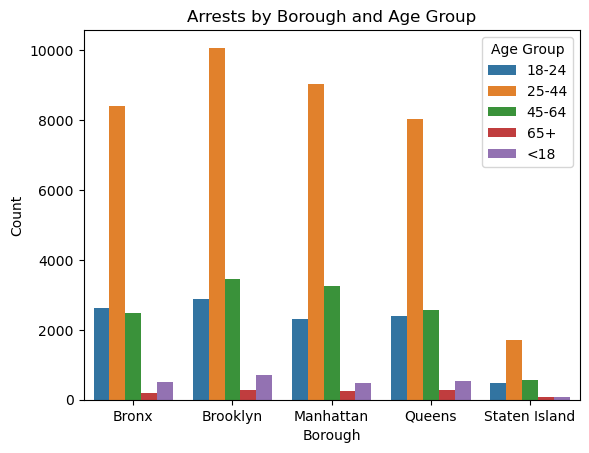

In [12]:
#Grouping the data by Borough and Age Group and getting the count of arrests
Grouped_Boro_Age = df_clean.groupby(['ARREST_BORO', 'AGE_GROUP']).size().reset_index(name='COUNT')

#Creating a bar graph visualization based on the grouped data
sns.barplot(data=Grouped_Boro_Age, x = 'ARREST_BORO', y = 'COUNT', hue = 'AGE_GROUP')
plt.title('Arrests by Borough and Age Group')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

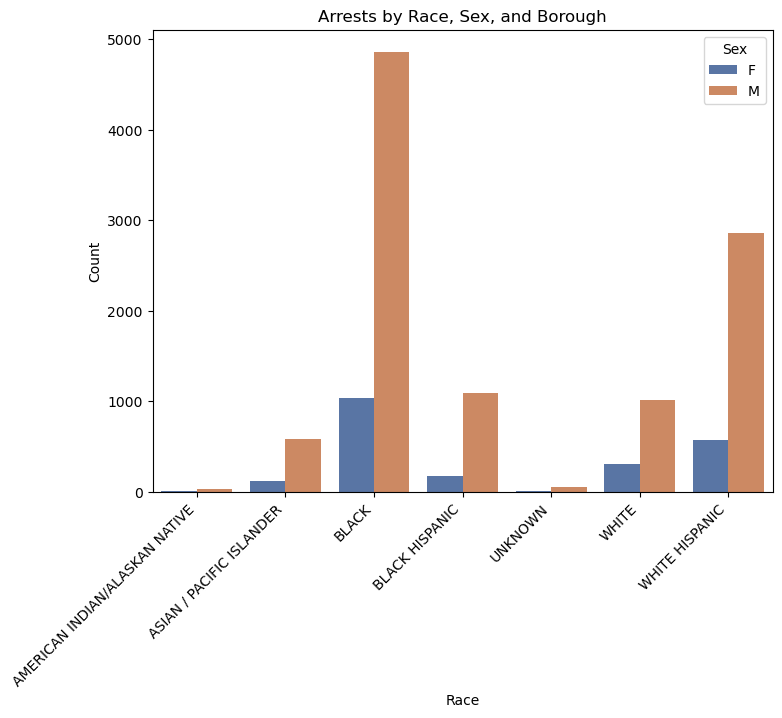

In [13]:
#Grouping the data by Borough and Age Group and getting the count of arrests
Grouped_Race_Sex_Age = df_clean.groupby(['PERP_RACE', 'PERP_SEX', 'ARREST_BORO']).size().reset_index(name='COUNT')

#Creating a bar graph visualization based on the grouped data
plt.figure(figsize=(8,6))
sns.barplot(data=Grouped_Race_Sex_Age, x = 'PERP_RACE', y = 'COUNT', hue = 'PERP_SEX', errorbar=None, palette='deep')
plt.title('Arrests by Race, Sex, and Borough')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.xticks(rotation=45, ha='right' )
plt.show()

## Conclusion

Based on the analysis of the dataset, it is evident that black individuals aged 25-44 have the highest arrest rate compared to other demographic groups. Additionally the data reveals that Brooklyn consistently experiences the highest crime rate among the five boroughs, while Staten Island consistently records the lowest crime rates. However, it is crucial to acknowldge the potential presence of bias within the dataset. While the data provides insights into arrest rates and crime distribution, it's essential to consider factors such as socioeconomic disparities, and systemic biases that may influence the observed patterns.